<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

## Lab 4.2.1: Feature Selection

### 1. Load & Explore Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


#### 1.1 Load Data

In [58]:
# Read CSV
wine_csv = 'C:\\Users\\apple\\Downloads\\winequality_merged.csv'
data =pd.read_csv(wine_csv)

#### 1.2 Explore Data (Exploratory Data Analysis)

In [59]:
# ANSWER
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [7]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red_wine              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [11]:
data.shape

(6497, 13)

In [12]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'red_wine'],
      dtype='object')

In [14]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
red_wine                0
dtype: int64

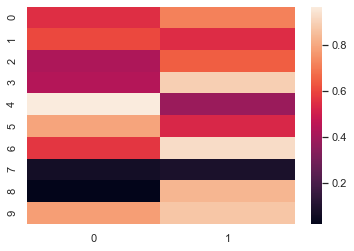

In [22]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
uniform_data = np.random.rand(10, 2)
uniform_data
ax = sns.heatmap(uniform_data)


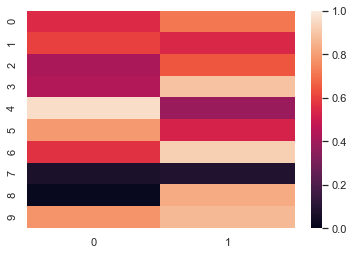

In [23]:
ax = sns.heatmap(uniform_data, vmin=0, vmax=1)

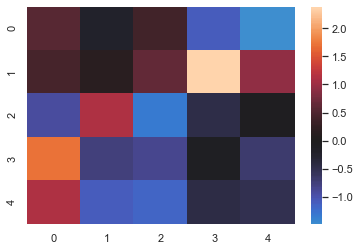

In [25]:
normal_data = np.random.randn(5, 5)
ax = sns.heatmap(normal_data, center=0)

In [31]:
flights = sns.load_dataset("flights")

flights = flights.pivot("month", "year", "passengers")
flights
#ax = sns.heatmap(flights)

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


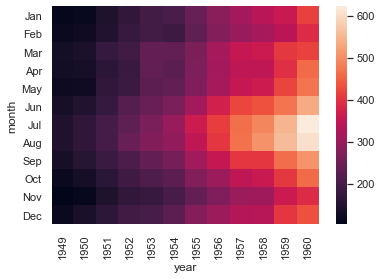

In [32]:
ax = sns.heatmap(flights)

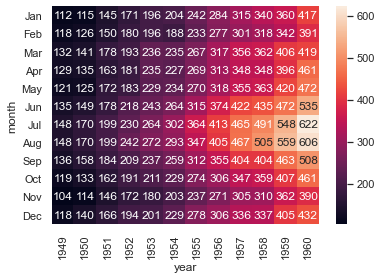

In [35]:

ax = sns.heatmap(flights, annot=True, fmt="d")

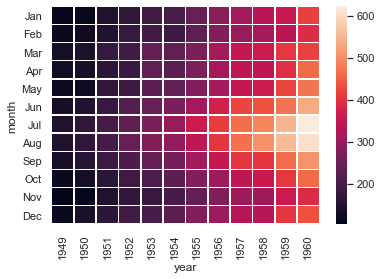

In [36]:
ax = sns.heatmap(flights, linewidths=.5)

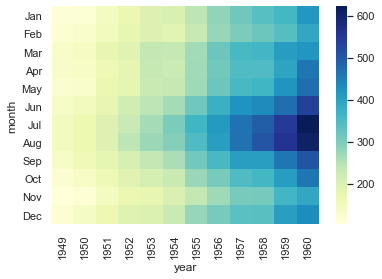

In [37]:
ax = sns.heatmap(flights, cmap="YlGnBu")

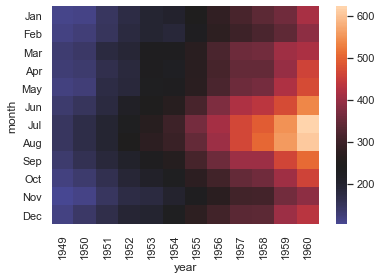

In [38]:
ax = sns.heatmap(flights, center=flights.loc["Jan", 1955])

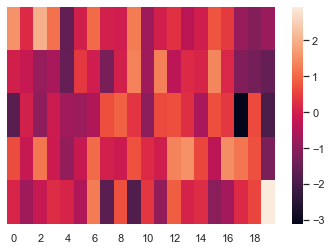

In [42]:
data = np.random.randn(5, 20)
ax = sns.heatmap(data, xticklabels=2, yticklabels=False)

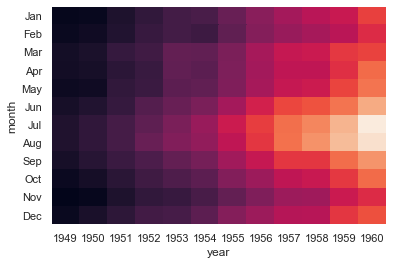

In [43]:
ax = sns.heatmap(flights, cbar=False)

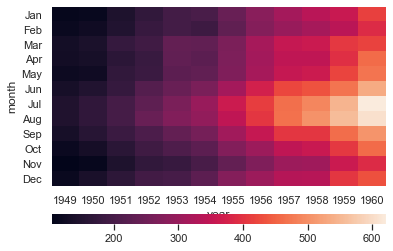

In [46]:
grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)
ax = sns.heatmap(flights, ax=ax,
    cbar_ax=cbar_ax,
    cbar_kws={"orientation": "horizontal"})

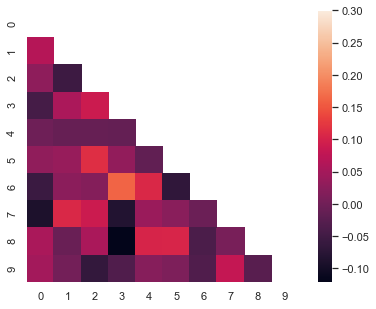

In [48]:
corr = np.corrcoef(np.random.randn(10, 200))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

In [ ]:
import numpy as np; np.random.seed(0)
    >>> import seaborn as sns; sns.set_theme()
    >>> uniform_data = np.random.rand(10, 12)
    >>> ax = sns.heatmap(uniform_data)

Change the limits of the colormap:

.. plot::
    :context: close-figs

    >>> ax = sns.heatmap(uniform_data, vmin=0, vmax=1)

Plot a heatmap for data centered on 0 with a diverging colormap:

.. plot::
    :context: close-figs

    >>> normal_data = np.random.randn(10, 12)
    >>> ax = sns.heatmap(normal_data, center=0)

Plot a dataframe with meaningful row and column labels:

.. plot::
    :context: close-figs

    >>> flights = sns.load_dataset("flights")
    >>> flights = flights.pivot("month", "year", "passengers")
    >>> ax = sns.heatmap(flights)

Annotate each cell with the numeric value using integer formatting:

.. plot::
    :context: close-figs

    >>> ax = sns.heatmap(flights, annot=True, fmt="d")

Add lines between each cell:

.. plot::
    :context: close-figs

    >>> ax = sns.heatmap(flights, linewidths=.5)

Use a different colormap:

.. plot::
    :context: close-figs

    >>> ax = sns.heatmap(flights, cmap="YlGnBu")

Center the colormap at a specific value:

.. plot::
    :context: close-figs

    >>> ax = sns.heatmap(flights, center=flights.loc["Jan", 1955])

Plot every other column label and don't plot row labels:

.. plot::
    :context: close-figs

    >>> data = np.random.randn(50, 20)
    >>> ax = sns.heatmap(data, xticklabels=2, yticklabels=False)

Don't draw a colorbar:

.. plot::
    :context: close-figs

    >>> ax = sns.heatmap(flights, cbar=False)

Use different axes for the colorbar:

.. plot::
    :context: close-figs

    >>> grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
    >>> f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)
    >>> ax = sns.heatmap(flights, ax=ax,
    ...                  cbar_ax=cbar_ax,
    ...                  cbar_kws={"orientation": "horizontal"})

Use a mask to plot only part of a matrix

.. plot::
    :context: close-figs

    >>> corr = np.corrcoef(np.random.randn(10, 200))
    >>> mask = np.zeros_like(corr)
    >>> mask[np.triu_indices_from(mask)] = True
    >>> with sns.axes_style("white"):
    ...     f, ax = plt.subplots(figsize=(7, 5))
    ...     ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

In [60]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218


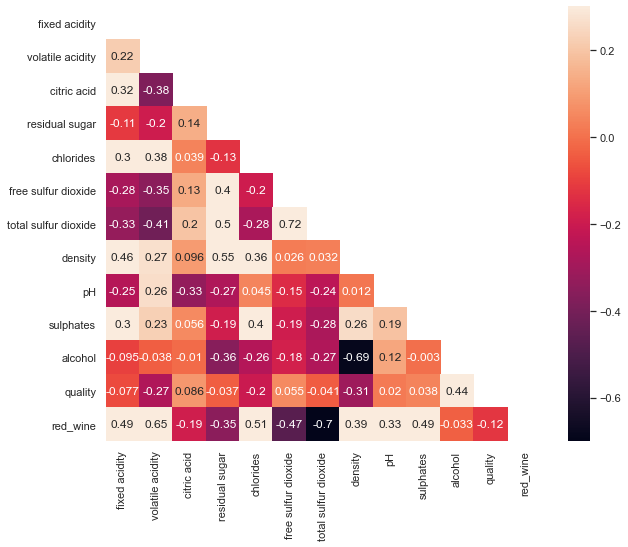

In [64]:
corr=data.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,annot=True)

### 2. Set Target Variable

Create a target variable for wine quality.

In [0]:
# Target Variable
#Quality

### 3. Set Predictor Variables

Create a predictor matrix with variables of your choice. State your reason.

In [0]:
# ANSWER
#alcohol
#density
#volatile acidity
#chlorides

In [65]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'red_wine'],
      dtype='object')

### 4. Using Linear Regression Create a Model and Test Score

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [70]:
X = data['alcohol'].values.reshape(-1,1)

y = data['quality']

In [71]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [72]:
## Check training/test data

# About training
print('X_train is a %s' % type(X_train))
print('X_train has %d rows', X_train.shape[0])
print('')
print('Sample of X_train%s' % ('_'*50))
print(X_train[:10])

print('')
print('y_train is a %s' % type(y_train))
print('y_train has %d rows', y_train.shape)
print('')
print('Sample of y_train%s' % ('_'*50))
print(y_train[:10])

X_train is a <class 'numpy.ndarray'>
X_train has %d rows 5197

Sample of X_train__________________________________________________
[[10.5]
 [12.4]
 [11.8]
 [11.7]
 [ 9.3]
 [10.1]
 [ 9.5]
 [10.1]
 [10.1]
 [ 9.4]]

y_train is a <class 'pandas.core.series.Series'>
y_train has %d rows (5197,)

Sample of y_train__________________________________________________
1916    5
947     7
877     6
2927    6
6063    5
293     6
2741    5
445     6
1562    5
4882    6
Name: quality, dtype: int64


In [74]:
# Create a model for Linear Regression
linreg = LinearRegression()

# Fit the model with the Training data
linreg.fit(X_train, y_train)

# Calculate the score (R^2 for Regression) for Training Data
print(linreg.score(X_train, y_train))

# Calculate the score (R^2 for Regression) for Testing Data
print(linreg.score(X_test, y_test))

0.20109549577996289
0.18158453862144674


### BONUS: Cross validation

In [77]:
# Cross validation 
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error

In [82]:
# Set up 5-fold cross validation  
k_fold = KFold(5, shuffle=True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X)):
    
    # Get training and test sets for X and y
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
    # Fit model with training set
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    # Make predictions with training and test set
    y_preds_train = linreg.predict(X_train)
    y_preds_test = linreg.predict(X_test)
    
    
    # Score R2 and RMSE on training and test sets and store in list
    train_scores.append(linreg.score(X_train, y_train))
    test_scores.append (linreg.score(X_test, y_test))
    train_rmse.append(mean_squared_error(y_train, y_preds_train, multioutput='raw_values'))
    test_rmse.append(mean_squared_error(y_test, y_preds_test, multioutput='raw_values'))
    
# Create a metrics_df dataframe to display r2 and rmse scores

d={"train_scores":train_scores.append,"test_scores":test_scores.append,
          "train_rmse":train_rmse,"test_rmse":test_rmse }
metrics_df=pd.DataFrame(data=d)

In [85]:
# Describe the metrics
metrics_df

,train_scores,test_scores,train_rmse,test_rmse
0,<built-in method append of list object at 0x00...,<built-in method append of list object at 0x00...,[0.6138492085090717],[0.6044380755188598]
1,<built-in method append of list object at 0x00...,<built-in method append of list object at 0x00...,[0.6138492085090717],[0.6044380755188598]
2,<built-in method append of list object at 0x00...,<built-in method append of list object at 0x00...,[0.6138492085090717],[0.6044380755188598]
3,<built-in method append of list object at 0x00...,<built-in method append of list object at 0x00...,[0.6138492085090717],[0.6044380755188598]
4,<built-in method append of list object at 0x00...,<built-in method append of list object at 0x00...,[0.6138492085090717],[0.6044380755188598]


### 5. Feature Selection

What's your score (R^2 for Regression) for Testing Data? 

How many feature have you selected? Can you improve your score by selecting different features?

**Please continue with Lab 4.2.2 with the same dataset.**



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



